In [45]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [5]:
# Read csv 
csv_file_path = 'Resources/employment_Influencing factors (thousands).csv'
employment_df = pd.read_csv(csv_file_path)
employment_df

,ref_area.label,sex.label,classif1.label,classif2.label,time,obs_value
0,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1710.337
1,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,316.510
2,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1393.827
3,Afghanistan,Sex: Total,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,636.501
4,Afghanistan,Sex: Total,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,88.431
...,...,...,...,...,...,...
258686,Zimbabwe,Sex: Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Sex: Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Sex: Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Sex: Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [6]:
# Rename columns 
new_column_names = {'ref_area.label': 'country', 'sex.label': 'gender', 'classif1.label':'education_level', 'classif2.label':'marital_status', 'time':'year','obs_value':'employee_count_thousands'}
employment_df.rename(columns=new_column_names, inplace=True)
employment_df.head()



,country,gender,education_level,marital_status,year,employee_count_thousands
0,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1710.337
1,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,316.510
2,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1393.827
3,Afghanistan,Sex: Total,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,636.501
4,Afghanistan,Sex: Total,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,88.431


In [7]:
# Get the unique country 
unique_country = employment_df['country'].unique()
unique_country
len(unique_country)

154

In [8]:
# Remove non-country data 
non_countries = ['"Cook Islands," "Micronesia, Federated States of," "Hong Kong, China," "Kosovo," "Occupied Palestinian Territory," "Niue," "Tokelau," "Wallis and Futuna Islands"']
employment_df = employment_df[~employment_df['country'].isin(non_countries)]

In [9]:
# Drop 'Sex:Total' from gender column, this project only compareing the unemployment rate by gender 
employment_df = employment_df[employment_df['gender'] != 'Sex: Total']
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
18,Afghanistan,Sex: Male,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1614.053
19,Afghanistan,Sex: Male,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,284.665
20,Afghanistan,Sex: Male,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1329.388
21,Afghanistan,Sex: Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,602.810
22,Afghanistan,Sex: Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,72.686
...,...,...,...,...,...,...
258686,Zimbabwe,Sex: Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Sex: Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Sex: Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Sex: Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [10]:
# Simplify 'gender' column : keep the format as 'male', 'female'
employment_df['gender'] = employment_df['gender'].str.replace('Sex: ', '')
employment_df.head()

,country,gender,education_level,marital_status,year,employee_count_thousands
18,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1614.053
19,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,284.665
20,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1329.388
21,Afghanistan,Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,602.810
22,Afghanistan,Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,72.686


In [11]:
# Drop 'Sex:Other' from gender column
employment_df = employment_df[employment_df['gender'] != 'Other']
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
18,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1614.053
19,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,284.665
20,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1329.388
21,Afghanistan,Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,602.810
22,Afghanistan,Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,72.686
...,...,...,...,...,...,...
258686,Zimbabwe,Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [12]:
# Clean the column of education_level
employment_df = employment_df[~employment_df['education_level'].str.contains("Total")]
employment_df = employment_df[~employment_df['education_level'].str.contains("Aggregate levels")]

employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
171,Afghanistan,Male,Education (ISCED-11): X. No schooling,Marital status (Aggregate): Total,2021,602.810
172,Afghanistan,Male,Education (ISCED-11): X. No schooling,Marital status (Aggregate): Single / Widowed /...,2021,72.686
173,Afghanistan,Male,Education (ISCED-11): X. No schooling,Marital status (Aggregate): Married / Union / ...,2021,530.124
174,Afghanistan,Male,Education (ISCED-11): 1. Primary education,Marital status (Aggregate): Total,2021,167.858
175,Afghanistan,Male,Education (ISCED-11): 1. Primary education,Marital status (Aggregate): Single / Widowed /...,2021,36.889
...,...,...,...,...,...,...
258686,Zimbabwe,Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [13]:
# Simplify 'education_level' column : remove "Education" for all rows
employment_df['education_level'] = employment_df['education_level'].str.replace('Education ', '')
employment_df



,country,gender,education_level,marital_status,year,employee_count_thousands
171,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Aggregate): Total,2021,602.810
172,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Aggregate): Single / Widowed /...,2021,72.686
173,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Aggregate): Married / Union / ...,2021,530.124
174,Afghanistan,Male,(ISCED-11): 1. Primary education,Marital status (Aggregate): Total,2021,167.858
175,Afghanistan,Male,(ISCED-11): 1. Primary education,Marital status (Aggregate): Single / Widowed /...,2021,36.889
...,...,...,...,...,...,...
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Female,(ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Female,(ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [14]:
# Clean the column of marital_status
employment_df = employment_df[~employment_df['marital_status'].str.contains("Total")]
employment_df = employment_df[~employment_df['marital_status'].str.contains("Aggregate")]

employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Detailed): Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Detailed): Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Detailed): Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Detailed): Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Marital status (Detailed): Single,2021,36.889
...,...,...,...,...,...,...
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Divorced or legally...,2014,2.229
258689,Zimbabwe,Female,(ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [15]:
# Simplify 'marital_status' column : remove "Marital status (Detailed)" for all rows
employment_df['marital_status'] = employment_df['marital_status'].str.split(': ').str[1]
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Single,2021,36.889
...,...,...,...,...,...,...
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Widowed,2014,1.761
258687,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Divorced or legally separated,2014,2.229
258689,Zimbabwe,Female,(ISCED-97): Level not stated,Married,2014,NaN


In [16]:
# Drop all rows with any NaN values
employment_df = employment_df.dropna()
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Single,2021,36.889
...,...,...,...,...,...,...
258681,Zimbabwe,Female,(ISCED-97): 3. Upper secondary education,Divorced or legally separated,2014,15.878
258684,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Single,2014,6.510
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Widowed,2014,1.761


In [17]:
# Drop rows where employee_count_thousands is 0
employment_df = employment_df[employment_df['employee_count_thousands'] != 0]
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Single,2021,36.889
...,...,...,...,...,...,...
258681,Zimbabwe,Female,(ISCED-97): 3. Upper secondary education,Divorced or legally separated,2014,15.878
258684,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Single,2014,6.510
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Widowed,2014,1.761


In [18]:
employment_df.to_csv('employment_cleaned.csv', index=False)


# Understanding Linear Regression: 
Linear Regression is a statistical model used to predict the relationship between independent and dependent variables. Examine 2 factors: Which variables in particular are significant predictors of the outcome variables? And, how significant is the Regression line to make predictions with highest possible accuracy. 

In [82]:
# Extract the independent and dependent variables
X = female_employment_df.loc[:, ['country','education_level','marital_status','year']].values  # independent variables
y = female_employment_df.loc[:, 'employee_count_thousands'].values  # dependent variable 

In [83]:
female_employment_df.dtypes

country                       int64
education_level               int64
marital_status                int64
year                          int64
employee_count_thousands    float64
dtype: object

In [81]:
female_employment_df.drop('gender', axis=1, inplace=True)

KeyError: "['gender'] not found in axis"

In [64]:
# # Create a copy to avoid modifying the original DataFrame
# df_encoded = female_employment_df.copy()

In [79]:
# Encode categorial data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Initiate LabelEncoder
label_encoder = LabelEncoder()

for column in ['country', 'education_level', 'marital_status']:
    X[column] = label_encoder.fit_transform(X[column])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [74]:
# One-hot encoding 

# Initialize the ColumnTransformer with OneHotEncoder for the categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['country', 'education_level', 'marital_status']),
    ],
    remainder='passthrough'  
)

encoded_data = column_transformer.fit_transform(female_employment_df)

encoded_df = pd.DataFrame(
    encoded_data,
    columns=column_transformer.get_feature_names_out()
)


ValueError: Shape of passed values is (16612, 1), indices imply (16612, 147)

<AxesSubplot:>

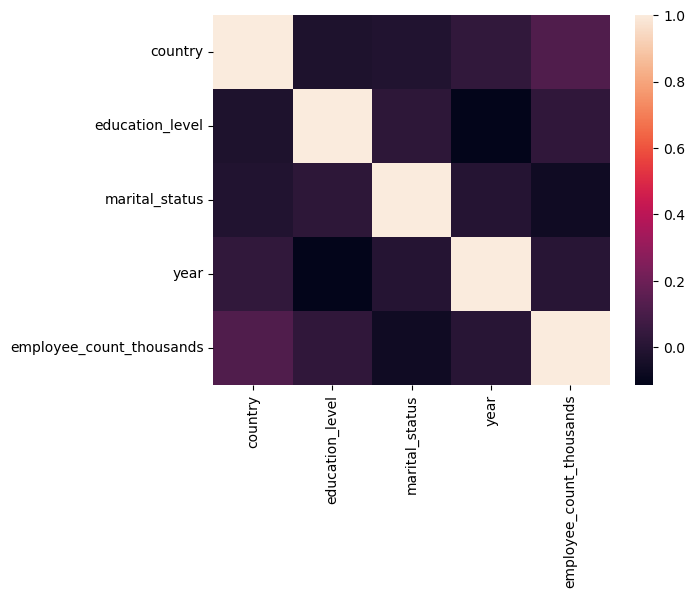

In [49]:
# Data visualisation 
# Building the correlation matrix 

corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix)

In [50]:
# Split the dataset into the training set and test set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
# Fitting multiple linear regression to the training set 
from sklearn.linear_model import LinearRegression

model_fit = LinearRegression()
model_fit.fit(X_train, y_train)





ValueError: could not convert string to float: 'Viet Nam'

In [ ]:
cluster_groups = cluster_data.groupby('cluster')['country'].apply(list)
cluster_groups

cluster
0    [Algeria, Bosnia and Herzegovina, Botswana, Ca...
1    [Afghanistan, Azerbaijan, Bangladesh, Belgium,...
2    [Australia, Austria, Belarus, Benin, Bolivia, ...
3    [Albania, Angola, Argentina, Armenia, Bahamas,...
Name: country, dtype: object

In [ ]:
len(cluster_groups[0])

26

In [ ]:
len(cluster_groups[1])

48

In [ ]:
len(cluster_groups[2])

74

In [ ]:
len(cluster_groups[3])

35

In [ ]:
print(f"Cluster_0 includes: {cluster_groups[0]}")
print(f"Cluster_1 includes: {cluster_groups[1]}")
print(f"Cluster_2 includes: {cluster_groups[2]}")
print(f"Cluster_3 includes: {cluster_groups[3]}")


Cluster_0 includes: ['Algeria', 'Bosnia and Herzegovina', 'Botswana', 'Cabo Verde', 'Djibouti', 'Egypt', 'Eswatini', 'French Guiana', 'Greece', 'Guadeloupe', 'Iran, Islamic Republic of', 'Iraq', 'Jordan', 'Kosovo', 'Lesotho', 'Namibia', 'North Macedonia', 'Réunion', 'Saint Lucia', 'Saudi Arabia', 'Somalia', 'South Africa', 'Spain', 'Tunisia', 'Tuvalu', 'Yemen']
Cluster_1 includes: ['Afghanistan', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bermuda', 'Bhutan', 'Bulgaria', 'Burkina Faso', 'Canada', 'Chile', 'Comoros', 'Dominican Republic', 'Estonia', 'Fiji', 'Finland', 'France', 'Honduras', 'Hungary', 'India', 'Ireland', 'Kiribati', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Marshall Islands', 'Mongolia', 'Montserrat', 'Nepal', 'Nigeria', 'Oman', 'Panama', 'Paraguay', 'Poland', 'Puerto Rico', 'Romania', 'Russian Federation', 'Rwanda', 'Slovakia', 'Slovenia', 'Sri Lanka', 'Sweden', 'Ukraine', 'United Arab Emirates', 'Uzbekistan', 'Venezuela, Bolivarian Republic of', 'Wallis and Futuna Is

In [ ]:
female_unemployment_df.head()

,country,gender,age_group,year,unemployment_rate,unemployment_level
6,0,Female,0,2021,5.50,Low
7,0,Female,1,2021,9.41,Low
8,0,Female,2,2021,3.77,Low
15,0,Female,0,2020,16.77,Medium
16,0,Female,1,2020,21.11,Medium


# Classification of Unemployment Levels Using Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Transform the unemployment_rate into categories
bins = [0, 15, 30, 100]  # Example bins - you may need to adjust these
labels = ['Low', 'Medium', 'High']
female_unemployment_df['unemployment_level'] = pd.cut(female_unemployment_df['unemployment_rate'], bins=bins, labels=labels)

# Encode categorical variables
label_encoder = LabelEncoder()
female_unemployment_df['country'] = label_encoder.fit_transform(female_unemployment_df['country'])
female_unemployment_df['age_group'] = label_encoder.fit_transform(female_unemployment_df['age_group'])

# Split the data into features and target
X = female_unemployment_df[['country', 'age_group', 'year']]  # features
y = female_unemployment_df['unemployment_level']  # target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Accuracy: 0.6717095310136157


# Model Optimisation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  # Handle imbalanced data

# Assuming you've loaded your data into female_unemployment_df

# Transform the unemployment_rate into categories
bins = [0, 15, 30, 100]
labels = ['Low', 'Medium', 'High']
female_unemployment_df.loc[:,'unemployment_level'] = pd.cut(female_unemployment_df.loc[:, 'unemployment_rate'], bins=bins, labels=labels)

# Encode categorical variables
label_encoder = LabelEncoder()
female_unemployment_df.loc[:,'country'] = label_encoder.fit_transform(female_unemployment_df['country'])
female_unemployment_df.loc[:,'age_group'] = label_encoder.fit_transform(female_unemployment_df['age_group'])

# Split the data into features and target
X = female_unemployment_df.loc[:,['country', 'age_group', 'year']]
y = female_unemployment_df.loc[:, 'unemployment_level']

# Handle imbalanced data
smote = SMOTE()
X, y = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict on the test set with the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-Validation
cross_val_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())


d:\1\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.94      0.89       484
         Low       0.87      0.76      0.81       491
      Medium       0.79      0.82      0.80       467

    accuracy                           0.84      1442
   macro avg       0.84      0.84      0.83      1442
weighted avg       0.84      0.84      0.83      1442

Confusion Matrix:
 [[453  10  21]
 [ 37 371  83]
 [ 41  45 381]]
Cross-Validation Scores: [0.65256588 0.68563498 0.7425399  0.68077724 0.72657876]
Mean CV Score: 0.6976193524107257
